# Neural Network created from scratch
by Zhonghan Deng

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/d5423197/LinkedIn/main/Neural%20Network/siCoData.csv')

In [3]:
'''
This is a toy dataset. Very easy.
'''
data.head()

,x,y
0,-0.889238,-0.334713
1,0.532539,0.898156
2,0.596540,0.870667
3,-0.375349,-0.713875
4,0.083465,0.401115


In [4]:
'''
Input: filename
Output: show image
'''
def image(filename):
    try:
        plt.figure(figsize=(20,20)) 
        img = mpimg.imread(filename)
        plt.imshow(img)
        plt.axis('off')
    except:
        print('Cant Find Image')

In [5]:
'''
Input: the number of neurons of first, mid(hidden), output layer.
Output: initial random value for w1(parameter matrix for first layer) and w2(parameter matrix for second layer)
'''
def init_para(first_layer_neuros, mid_layer_neuros, output_layer_neuros):
    w1 = np.random.rand(first_layer_neuros, mid_layer_neuros)
    w2 = np.random.rand(mid_layer_neuros, output_layer_neuros)
    return w1, w2

In [6]:
'''
Tanh function
'''
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [7]:
'''
Forward propagation
'''
def forward(w1, w2, X):
    s1 = X.dot(w1)
    thetas1 = tanh(s1)
    s2 = thetas1.dot(w2)
    return s1, s2, thetas1

In [8]:
'''
Backward propagation
'''
def backward(thetas1, s2, X, y, w1, w2):
    dw2 = thetas1.T.dot(2 * (s2 - y))
    dw1 = X.T.dot(2 * (s2 - y).dot(w2.T) * (1 - thetas1**2))
    return dw1, dw2

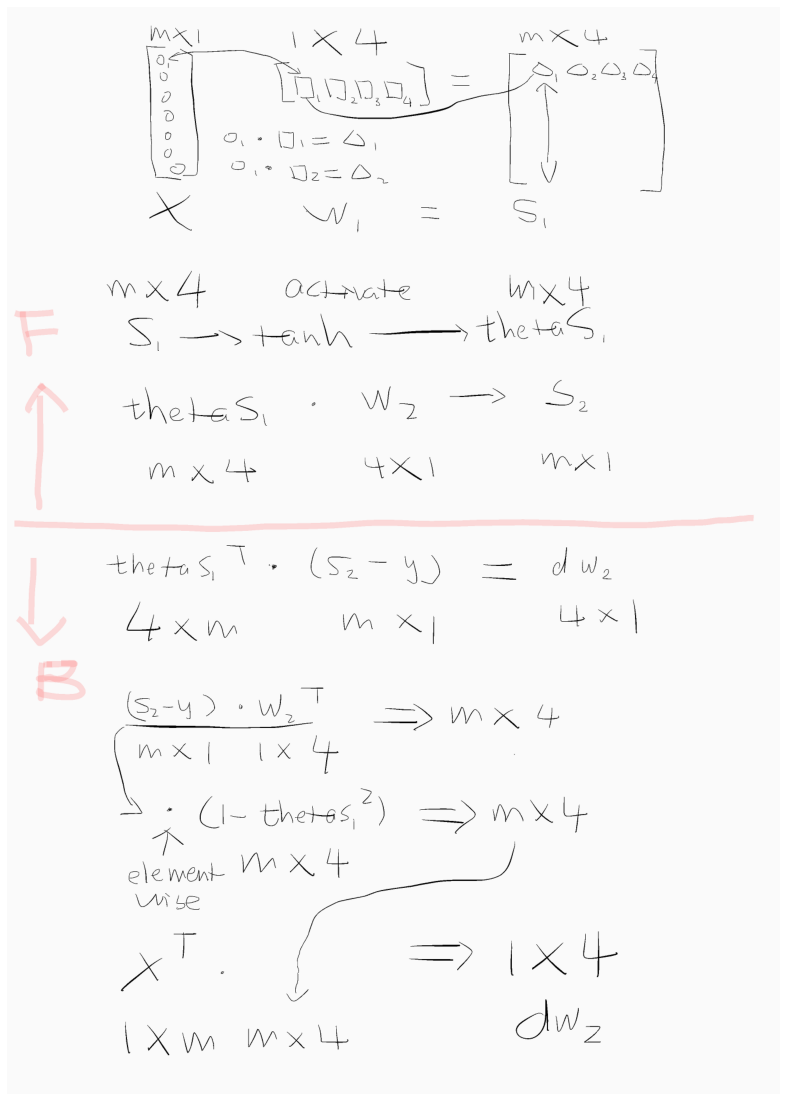

In [9]:
image('f.PNG')

In [10]:
'''
This funtion is to update w1 and w2
'''
def update(w1, w2, dw1, dw2, learning_rate):
    w2 = w2 - learning_rate * dw2
    w1 = w1 - learning_rate * dw1
    return w1, w2

In [11]:
def nn(X, y, learning_rate):
    'Initial w1 and w2'
    w1, w2 = init_para(1,4,1)
    'Initial best_error and best_combo'
    best_error = float('inf')
    best_combo = None
    'Shuffle data'
    shuffler = np.random.permutation(len(X))
    X = X[shuffler]
    y = y[shuffler]
    for i in range(10000):
        'Forward'
        s1, s2, thetas1 = forward(w1,w2,X)
        'Backward'
        dw1, dw2 = backward(thetas1, s2, X, y, w1, w2)
        'Update parameter'
        w1, w2 = update(w1, w2, dw1, dw2, learning_rate)
        'Calculate error'
        error = sum(((s2 - y)**2)/len(X))
        'Update best_error and best_combo'
        if error < best_error:
            best_error = error
            best_combo = w1, w2
    return best_combo, best_error

In [12]:
'''
This function is to create train and test set
'''
def make_train_test(data):
    X = np.array(data['x']).reshape(-1,1)
    y = np.array(data['y']).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [13]:
'''
This function is to make prediction
'''
def make_pred(w1, w2, X):
    s1, s2, thetas1 = forward(w1, w2, X)
    return s2

In [14]:
'''
This function is to make the plot of prediction vs actual value
'''
def make_plot(X, y_actual, y_predict):
    plt.scatter(X, y_actual, label = 'Actual')
    plt.scatter(X, y_predict, label = 'Predicted')
    plt.legend(loc = 'upper left')
    plt.show()

In [15]:
X_train, X_test, y_train, y_test = make_train_test(data)

In [16]:
best_combo, best_error = nn(X_train, y_train, 0.001)

In [17]:
y_pred = make_pred(best_combo[0], best_combo[1], X_test)

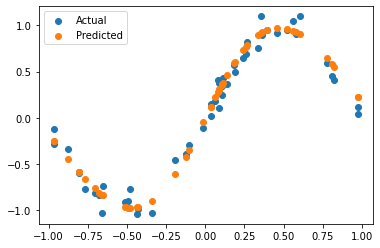

In [18]:
make_plot(X_test, y_test, y_pred)